In [533]:
#Création de la classe
import os.path
import matplotlib.pyplot as plt
import numpy as np
class CompteBancaire():
    "création d'une simulation de banque et de ses fonctions"
    

    def __init__(self, name, iden, mdp):
        self.name = name
        self.iden = iden
        self.mdp = mdp


        writer = open("repertoire.txt", "a")
        writer.write(self.iden + " ")
        writer.write(self.mdp + " ")
        writer.write(self.name+" ")
        writer.write("None")
        writer.write(" ")
        writer.write("None")
        writer.write("\n")

        writer.close()
            
        
    def affiche(self):
        fds=open("repertoire.txt", "r")
        if fds.mode == 'r':
            contents = fds.readlines()
        fds.close()
        print(contents)
            
    def identité(self):
        self.condition_de_boucle = False
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        while self.condition_de_boucle != True:
            self.verif = input('Veuillez entrer votre identifiant : ')
            self.verif2 = input('Veuillez entrer votre mot de passe : ')
            for i in range(len(self.contenu)):
                self.ligne = self.contenu[i]
                self.coupe = self.ligne.split(" ")
                self.pseudo = self.coupe[0]
                self.motdepasse=self.coupe[1]
                if self.pseudo == self.verif and self.motdepasse == self.verif2:
                    self.pseudo = self.verif
                    self.motdepasse = self.verif2
                    print("Vous êtes bien connecté")
                    self.condition_de_boucle = True
                    break
                    
    def creer_historique(self):
        writer = open("historique_courant.txt", "a")
        writer = open("historique_epargne.txt", "a")

    def creer_compte_courant(self):
        self.condition_de_boucle = False
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
            if pseudo == self.verif and motdepasse == self.verif2:
                self.contenu[i]=""
                self.banque = '0'
                self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.banque + " " + 'None'+ '\n')
                print('Compte courant crée')
                writer = open('repertoire.txt','w+')
                for z in range(len(self.contenu)):
                    writer.write(self.contenu[z])
                writer.close()
    
    def creer_compte_épargne(self):
        self.condition_de_boucle = False
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        if self.banque == '0':
            for i in range(len(self.contenu)):
                self.ligne = self.contenu[i]
                self.coupe = self.ligne.split(" ")
                pseudo = self.coupe[0]
                motdepasse=self.coupe[1]
                nom = self.coupe[2]
                if pseudo == self.verif and motdepasse == self.verif2:
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + '0' + " " + '0' + '\n')
                    print('Compte épargne crée')
                    writer = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        writer.write(self.contenu[z])
                    writer.close()
        else:
            print("Veuillez crée un compte courant avant un compte épargne")
                

    
    def depot(self):
        self.liste1 = []
        self.liste2 = []
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        depot = int(input("Veuiller saisir le montant à déposer : "))
        for i in range(len(self.contenu)):
            f = open("repertoire.txt", 'r')
            if f.mode == 'r':
                self.contenu = f.readlines()
            f.close()
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
            if pseudo == self.verif and motdepasse == self.verif2:
                fw = open('historique_courant.txt', 'a')
                choix = input("Choisissez votre compte : ")
                condition = str(choix)
                if condition == "compte courant" or condition == "Compte courant" or condition == '1':
                    
                    result = int(self.coupe[3])+depot
                    self.coupe[3] = str(result)
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                    fw.write(self.coupe[3])
                    fw.write(' ')
                    fw.close()
                    file = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        file.write(self.contenu[z])
                    file.close()
                    
                        
                elif condition == "compte epargne" or condition == "Compte epargne" or condition == '2':
                    fw1 = open('historique_epargne.txt', 'a')
                    result2 = int(self.coupe[4])+depot
                    self.coupe[4] = str(result2)
                    
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                    fw1.write(self.coupe[4])
                    fw.write(' ')
                    fw1.close()
                    file = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        file.write(self.contenu[z])
                    file.close()
                    
                else:
                    print('Veuillez choisir un compte valide')
                    
    def simulation(self):
        self.nombre_année = int(input("Choisissez un nombre d'année pour simuler l'argent de votre compte_épargne"))
        for i in range(1,self.nombre_année+1):
            simulation = int(self.coupe[4]) + (int(self.coupe[4])*0.6)
        return simulation, self.nombre_année
                    
                    
    
    def retrait(self):
        self.liste1 = []
        self.liste2 = []
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        depot = int(input("Veuiller saisir le montant à retirer : "))
        for i in range(len(self.contenu)):
            f = open("repertoire.txt", 'r')
            if f.mode == 'r':
                self.contenu = f.readlines()
            f.close()
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]
            if pseudo == self.verif and motdepasse == self.verif2:
                fw = open('historique_courant.txt', 'a')
                choix = input("Choisissez votre compte : ")
                condition = str(choix)
                if condition == "compte courant" or condition == "Compte courant" or condition == '1':
                    
                    result = int(self.coupe[3])-depot
                    self.coupe[3] = str(result)
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                    fw.write(self.coupe[3])
                    fw.write(' ')
                    fw.close()
                    file = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        file.write(self.contenu[z])
                    file.close()
                    
                        
                elif condition == "compte epargne" or condition == "Compte epargne" or condition == '2':
                    fw1 = open('historique_epargne.txt', 'a')
                    result2 = int(self.coupe[4])-depot
                    self.coupe[4] = str(result2)
                    
                    self.contenu[i]=""
                    self.contenu.append(pseudo + " " + motdepasse + " " + nom + " " + self.coupe[3] + " " + self.coupe[4])
                    fw1.write(self.coupe[4])
                    fw.write(' ')
                    fw1.close()
                    file = open('repertoire.txt','w+')
                    for z in range(len(self.contenu)):
                        file.write(self.contenu[z])
                    file.close()
                    
                else:
                    print('Veuillez choisir un compte valide')
                    
    def afficher_compte(self):
        f = open("repertoire.txt", 'r')
        if f.mode == 'r':
            self.contenu = f.readlines()
        f.close()
        for i in range(len(self.contenu)):
            self.ligne = self.contenu[i]
            self.coupe = self.ligne.split(" ")
            pseudo = self.coupe[0]
            motdepasse=self.coupe[1]
            nom = self.coupe[2]         
            if pseudo == self.verif and motdepasse == self.verif2:
                return self.coupe[3], self.coupe[4]
    
    def graphique_courant(self):
        liste = []
        indice = []
        bowl = open('historique_courant.txt','r')
        if bowl.mode == 'r':
            hist = bowl.readlines()
        bowl.close()
        for i in range(len(hist)):
            ligne = hist[i]
            coupe = ligne.split(' ')
        for i in range(len(coupe)):
            liste.append(coupe[i])
            indice.append(i)
        del liste[-1]
        del indice[-1]
        ints = [int(item) for item in liste]
        x = np.array(indice)
        y = np.array(ints)
        plt.plot(x,y)
        plt.show()
        
def effacer_compte():
    os.remove('repertoire.txt')
def effacer_historique():
    os.remove('historique_courant.txt')
    os.remove('historique_epargne.txt')
        

In [534]:
effacer_historique()

In [535]:
effacer()

In [536]:
user = CompteBancaire("ke", "k","1")

In [537]:
user = CompteBancaire("je", "j","2")

In [538]:
user = CompteBancaire("le", "l",'3')

In [539]:
user.creer_historique()

In [540]:
user.affiche()

['k 1 ke None None\n', 'j 2 je None None\n', 'l 3 le None None\n']


In [541]:
user.identité()

Veuillez entrer votre identifiant : j
Veuillez entrer votre mot de passe : 2
Vous êtes bien connecté


In [542]:
user.creer_compte_courant()

Compte courant crée


In [543]:
user.creer_compte_épargne()

Compte épargne crée


In [547]:
user.depot()

Veuiller saisir le montant à déposer : 30
Choisissez votre compte : 1


In [548]:
user.retrait()

Veuiller saisir le montant à retirer : 10
Choisissez votre compte : 1


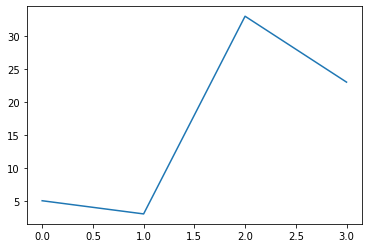

In [549]:
user.graphique_courant()

In [423]:
user.afficher_compte()

('90', '0\n')

In [382]:
user.simulation()

Choisissez un nombre d'année pour simuler l'argent de votre compte_épargne15


(160.0, 15)